<a href="https://colab.research.google.com/github/Eya-Dhif/Reseaux-neuronaux-convolutifs/blob/main/convolutionalneuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib

In [ ]:
train_root =pathlib.Path("C:/Users/HP/Downloads/fruits-360-original-size/Training")
test_root = pathlib.Path("C:/Users/HP/Downloads/fruits-360-original-size/Test")

In [ ]:
batch_size = 10

(411, 454, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


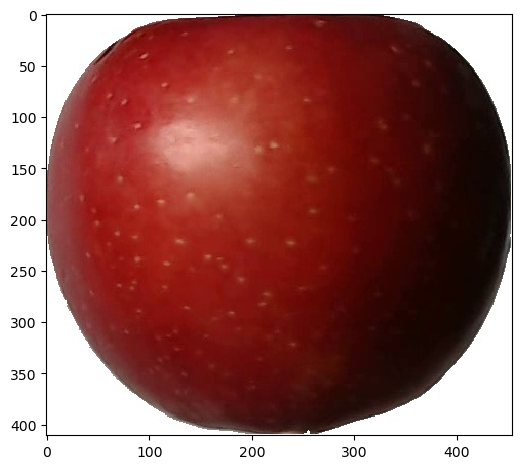

In [ ]:
from skimage import io
image = io.imread("C:/Users/HP/Downloads/fruits-360-original-size/Training/apple_braeburn_1/r0_102.jpg")
print(image.shape)
print(image)
io.imshow(image)

In [ ]:
Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (100,100), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (100,100), batch_size=batch_size)


Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


In [ ]:
num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

24


In [ ]:
model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape=(100, 100, 3),
 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))
model.add(Conv2D(64, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(num_classes, activation="softmax"))

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
model.compile(loss=keras.losses.categorical_crossentropy,
 optimizer=optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=2)

Epoch 1/2
624/624 [==============================] - 157s 248ms/step - loss: 1.3874 - accuracy: 0.6193
Epoch 2/2
624/624 [==============================] - 154s 246ms/step - loss: 0.3939 - accuracy: 0.8798


In [ ]:
score = model.evaluate(train_data)
print(score)
score = model.evaluate(test_data)
print(score)

624/624 [==============================] - 68s 109ms/step - loss: 0.1989 - accuracy: 0.9287
[0.19892582297325134, 0.9287433624267578]
311/311 [==============================] - 40s 130ms/step - loss: 0.1993 - accuracy: 0.9267
[0.19933325052261353, 0.9266880750656128]


In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
resnet_model = ResNet50(include_top=False, weights='imagenet',input_shape=(100,100,3))
resnet_model.trainable = False
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
model = Sequential()
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizers.Adam(), metrics=['accuracy'])

94765736/94765736 [==============================] - 175s 2us/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 24)                49176     
                                                                 
Total params: 23,636,888
Trainable params: 49,176
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.fit(train_data, epochs=1)

624/624 [==============================] - 517s 819ms/step - loss: 0.3183 - accuracy: 0.9315


In [ ]:
score = model.evaluate(train_data)
print(score)
score = model.evaluate(test_data)
print(score)

624/624 [==============================] - 525s 839ms/step - loss: 0.0324 - accuracy: 0.9992
[0.03242776170372963, 0.9991975426673889]
311/311 [==============================] - 263s 845ms/step - loss: 0.0335 - accuracy: 0.9994
[0.03345346078276634, 0.9993569254875183]


In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
import pathlib
import os
train_root =pathlib.Path("C:/Users/HP/Downloads/fruits-360-original-size/Training")
test_root = pathlib.Path("C:/Users/HP/Downloads/fruits-360-original-size/Test")
from tensorflow.keras.applications.resnet import ResNet50
resnet_model = ResNet50(include_top=False, weights='imagenet',
  input_shape=(100,100,3))
resnet_model.trainable = False
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
model = Sequential()
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
num_classes = len([i for i in os.listdir(train_root)])
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
  optimizer=optimizers.Adam(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                49176     
                                                                 
Total params: 23,636,888
Trainable params: 49,176
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
batch_size = 10
model.fit(train_data, epochs=1)

624/624 [==============================] - 528s 846ms/step - loss: 0.0198 - accuracy: 0.9997


In [ ]:
score = model.evaluate(train_data)
print(score)
score = model.evaluate(test_data)
print(score)

624/624 [==============================] - 564s 901ms/step - loss: 0.0426 - accuracy: 0.9978
[0.042588114738464355, 0.9977531433105469]
311/311 [==============================] - 278s 894ms/step - loss: 0.0430 - accuracy: 0.9977
[0.042986344546079636, 0.9977492094039917]
